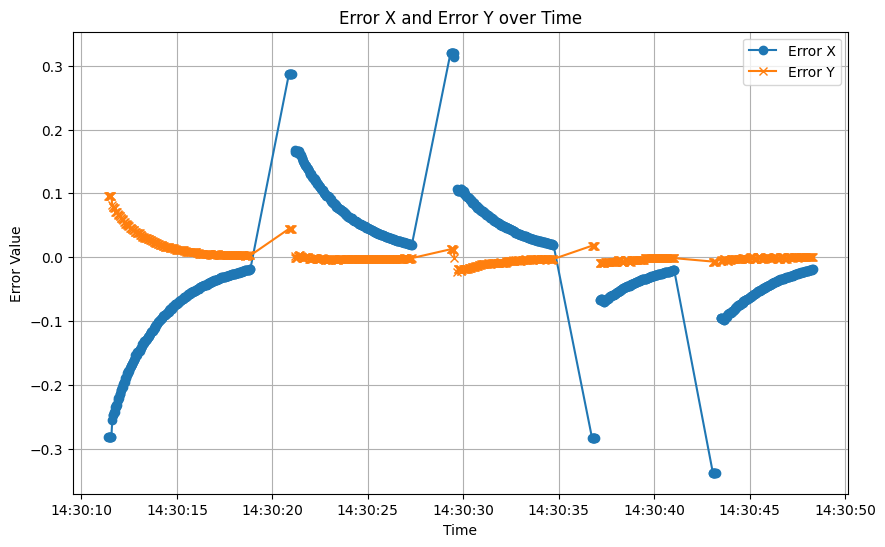

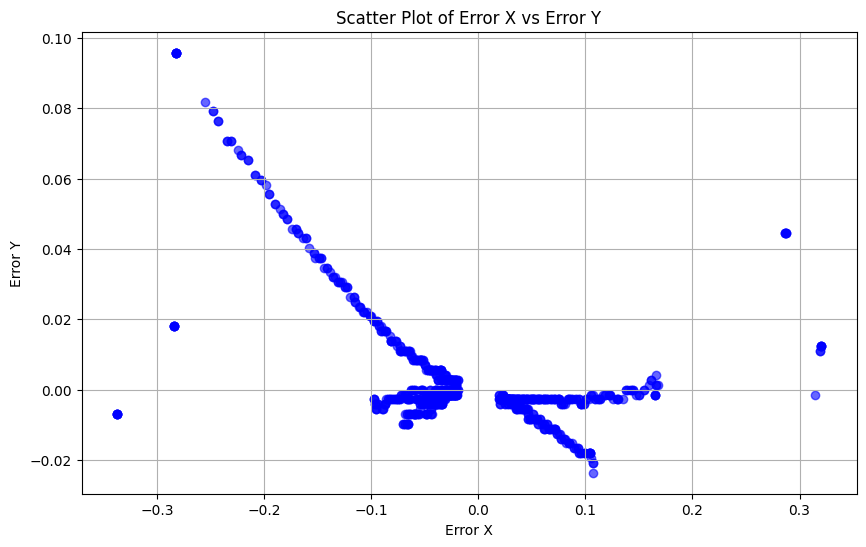

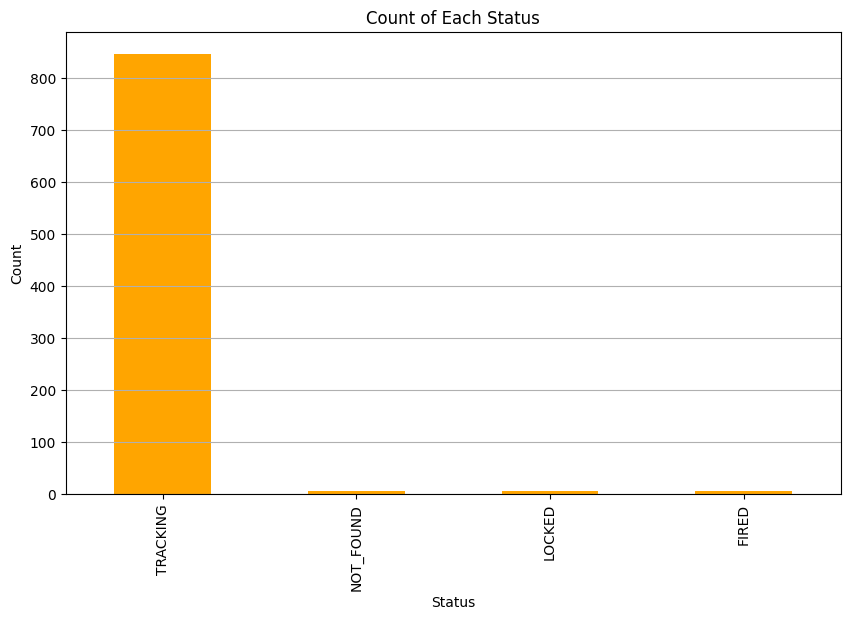

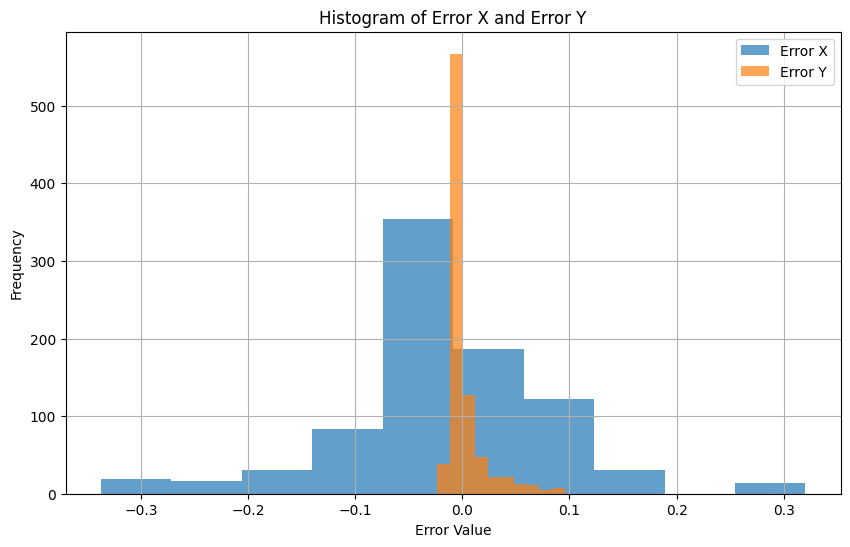

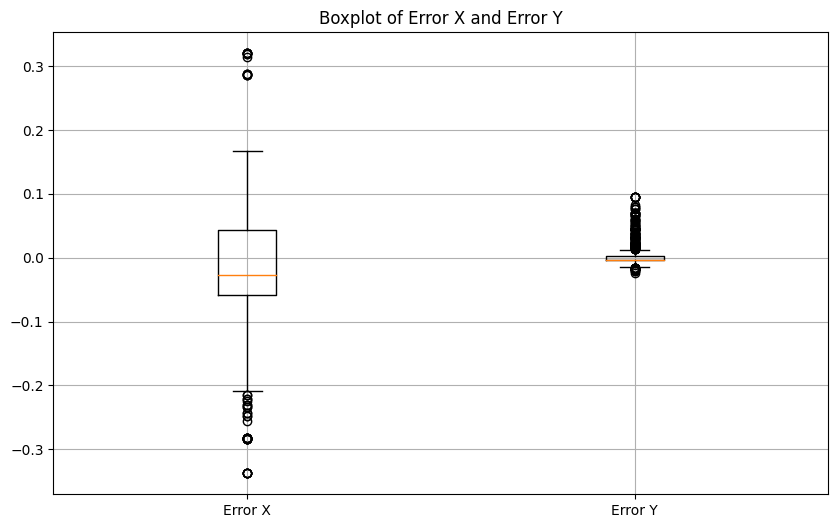

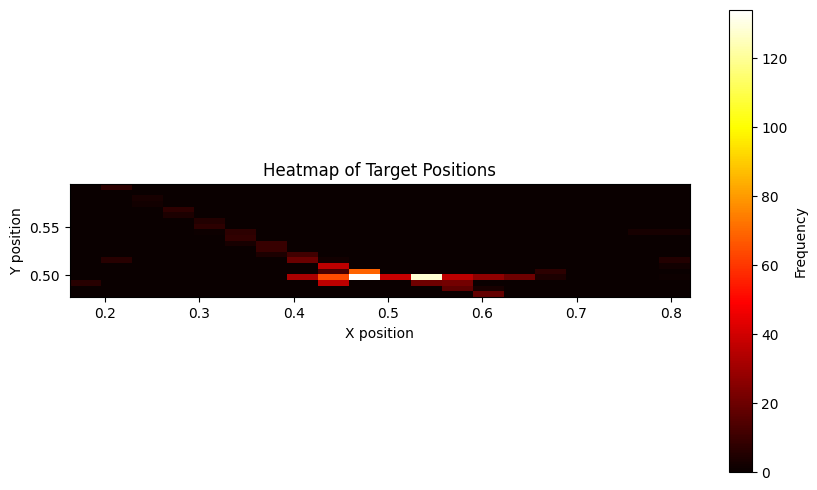

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# อ่านไฟล์ CSV
df = pd.read_csv("robomaster_laser.csv", parse_dates=["timestamp"])

plt.rcParams["figure.figsize"] = (10, 6)

# ===== 1. Line plot =====
if not df["error_x"].dropna().empty and not df["error_y"].dropna().empty:
    plt.figure()
    plt.plot(df["timestamp"], df["error_x"], label="Error X", marker='o')
    plt.plot(df["timestamp"], df["error_y"], label="Error Y", marker='x')
    plt.xlabel("Time")
    plt.ylabel("Error Value")
    plt.title("Error X and Error Y over Time")
    plt.legend()
    plt.grid(True)

# ===== 2. Scatter plot =====
if not df["error_x"].dropna().empty and not df["error_y"].dropna().empty:
    plt.figure()
    plt.scatter(df["error_x"], df["error_y"], c='blue', alpha=0.6)
    plt.xlabel("Error X")
    plt.ylabel("Error Y")
    plt.title("Scatter Plot of Error X vs Error Y")
    plt.grid(True)

# ===== 3. Bar chart =====
if not df["status"].dropna().empty:
    plt.figure()
    df["status"].value_counts().plot(kind="bar", color='orange')
    plt.xlabel("Status")
    plt.ylabel("Count")
    plt.title("Count of Each Status")
    plt.grid(axis='y')

# ===== 4. Histogram =====
if not df["error_x"].dropna().empty and not df["error_y"].dropna().empty:
    plt.figure()
    plt.hist(df["error_x"].dropna(), bins=10, alpha=0.7, label="Error X")
    plt.hist(df["error_y"].dropna(), bins=10, alpha=0.7, label="Error Y")
    plt.xlabel("Error Value")
    plt.ylabel("Frequency")
    plt.title("Histogram of Error X and Error Y")
    plt.legend()
    plt.grid(True)

# ===== 5. Boxplot =====
if not df[["error_x", "error_y"]].dropna().empty:
    plt.figure()
    plt.boxplot([df["error_x"].dropna(), df["error_y"].dropna()],
                labels=["Error X", "Error Y"])
    plt.title("Boxplot of Error X and Error Y")
    plt.grid(True)

# ===== 6. Heatmap ของตำแหน่งเป้าหมาย (x,y) =====
xy_df = df.dropna(subset=["x", "y"])

if len(xy_df) > 1:  # ต้องมีอย่างน้อย 2 จุดถึงจะสร้าง heatmap ได้
    plt.figure()
    heatmap, xedges, yedges = np.histogram2d(xy_df["x"], xy_df["y"], bins=20)
    plt.imshow(
        heatmap.T, 
        origin='lower', 
        cmap='hot', 
        extent=[xy_df["x"].min(), xy_df["x"].max(), xy_df["y"].min(), xy_df["y"].max()]
    )
    plt.colorbar(label="Frequency")
    plt.xlabel("X position")
    plt.ylabel("Y position")
    plt.title("Heatmap of Target Positions")


plt.show()


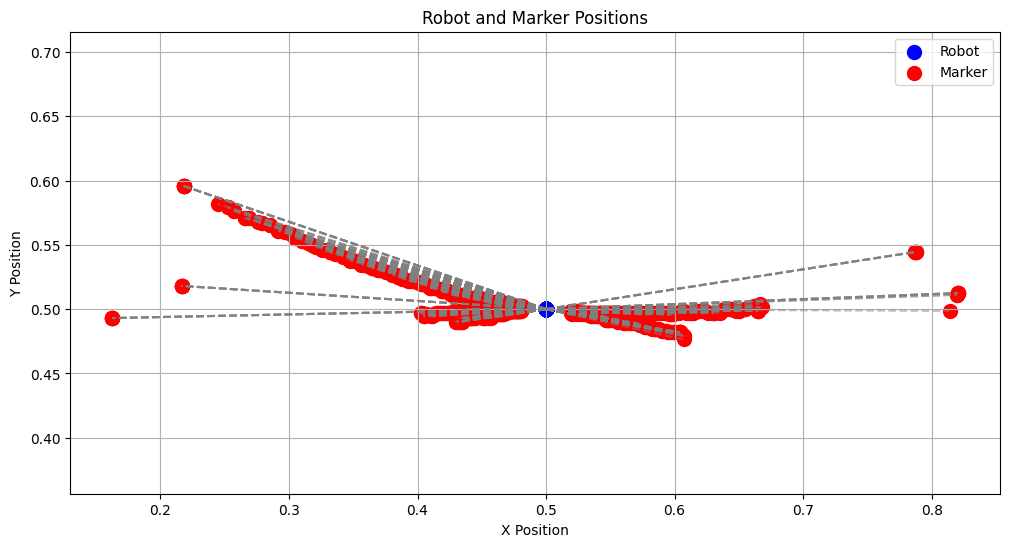

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูลจาก CSV
df = pd.read_csv("robomaster_laser.csv")

# คำนวณตำแหน่งหุ่นยนต์
df["robot_x"] = df["x"] - df["error_x"]
df["robot_y"] = df["y"] - df["error_y"]

# สร้างกราฟ
plt.figure(figsize=(12, 6))

# จุดตำแหน่งหุ่นยนต์
plt.scatter(df["robot_x"], df["robot_y"], color="blue", label="Robot", s=100)

# จุดตำแหน่ง marker
plt.scatter(df["x"], df["y"], color="red", label="Marker", s=100)

# เส้นเชื่อม robot → marker
for i in range(len(df)):
    plt.plot([df["robot_x"][i], df["x"][i]],
             [df["robot_y"][i], df["y"][i]],
             color="gray", linestyle="--", alpha=0.5)

plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Robot and Marker Positions")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()
